In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [51]:
df = pd.read_csv("./data/dataset.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [53]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [54]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [55]:
le = LabelEncoder()
col = ["Gender", "CampaignChannel","CampaignType","AdvertisingPlatform","AdvertisingTool"]
for i in col:
    df[i] = le.fit_transform(df[i])

In [56]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,0,136912,4,0,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,0,0,1
1,8001,69,1,41760,0,3,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,0,0,1
2,8002,46,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,0,0,1
3,8003,32,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,0,0,1
4,8004,60,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,1,24849,0,0,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,0,0,0
7996,15996,43,0,44718,3,3,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,0,0,0
7997,15997,28,0,125471,2,1,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,0,0,1
7998,15998,19,0,107862,1,1,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,0,0,1


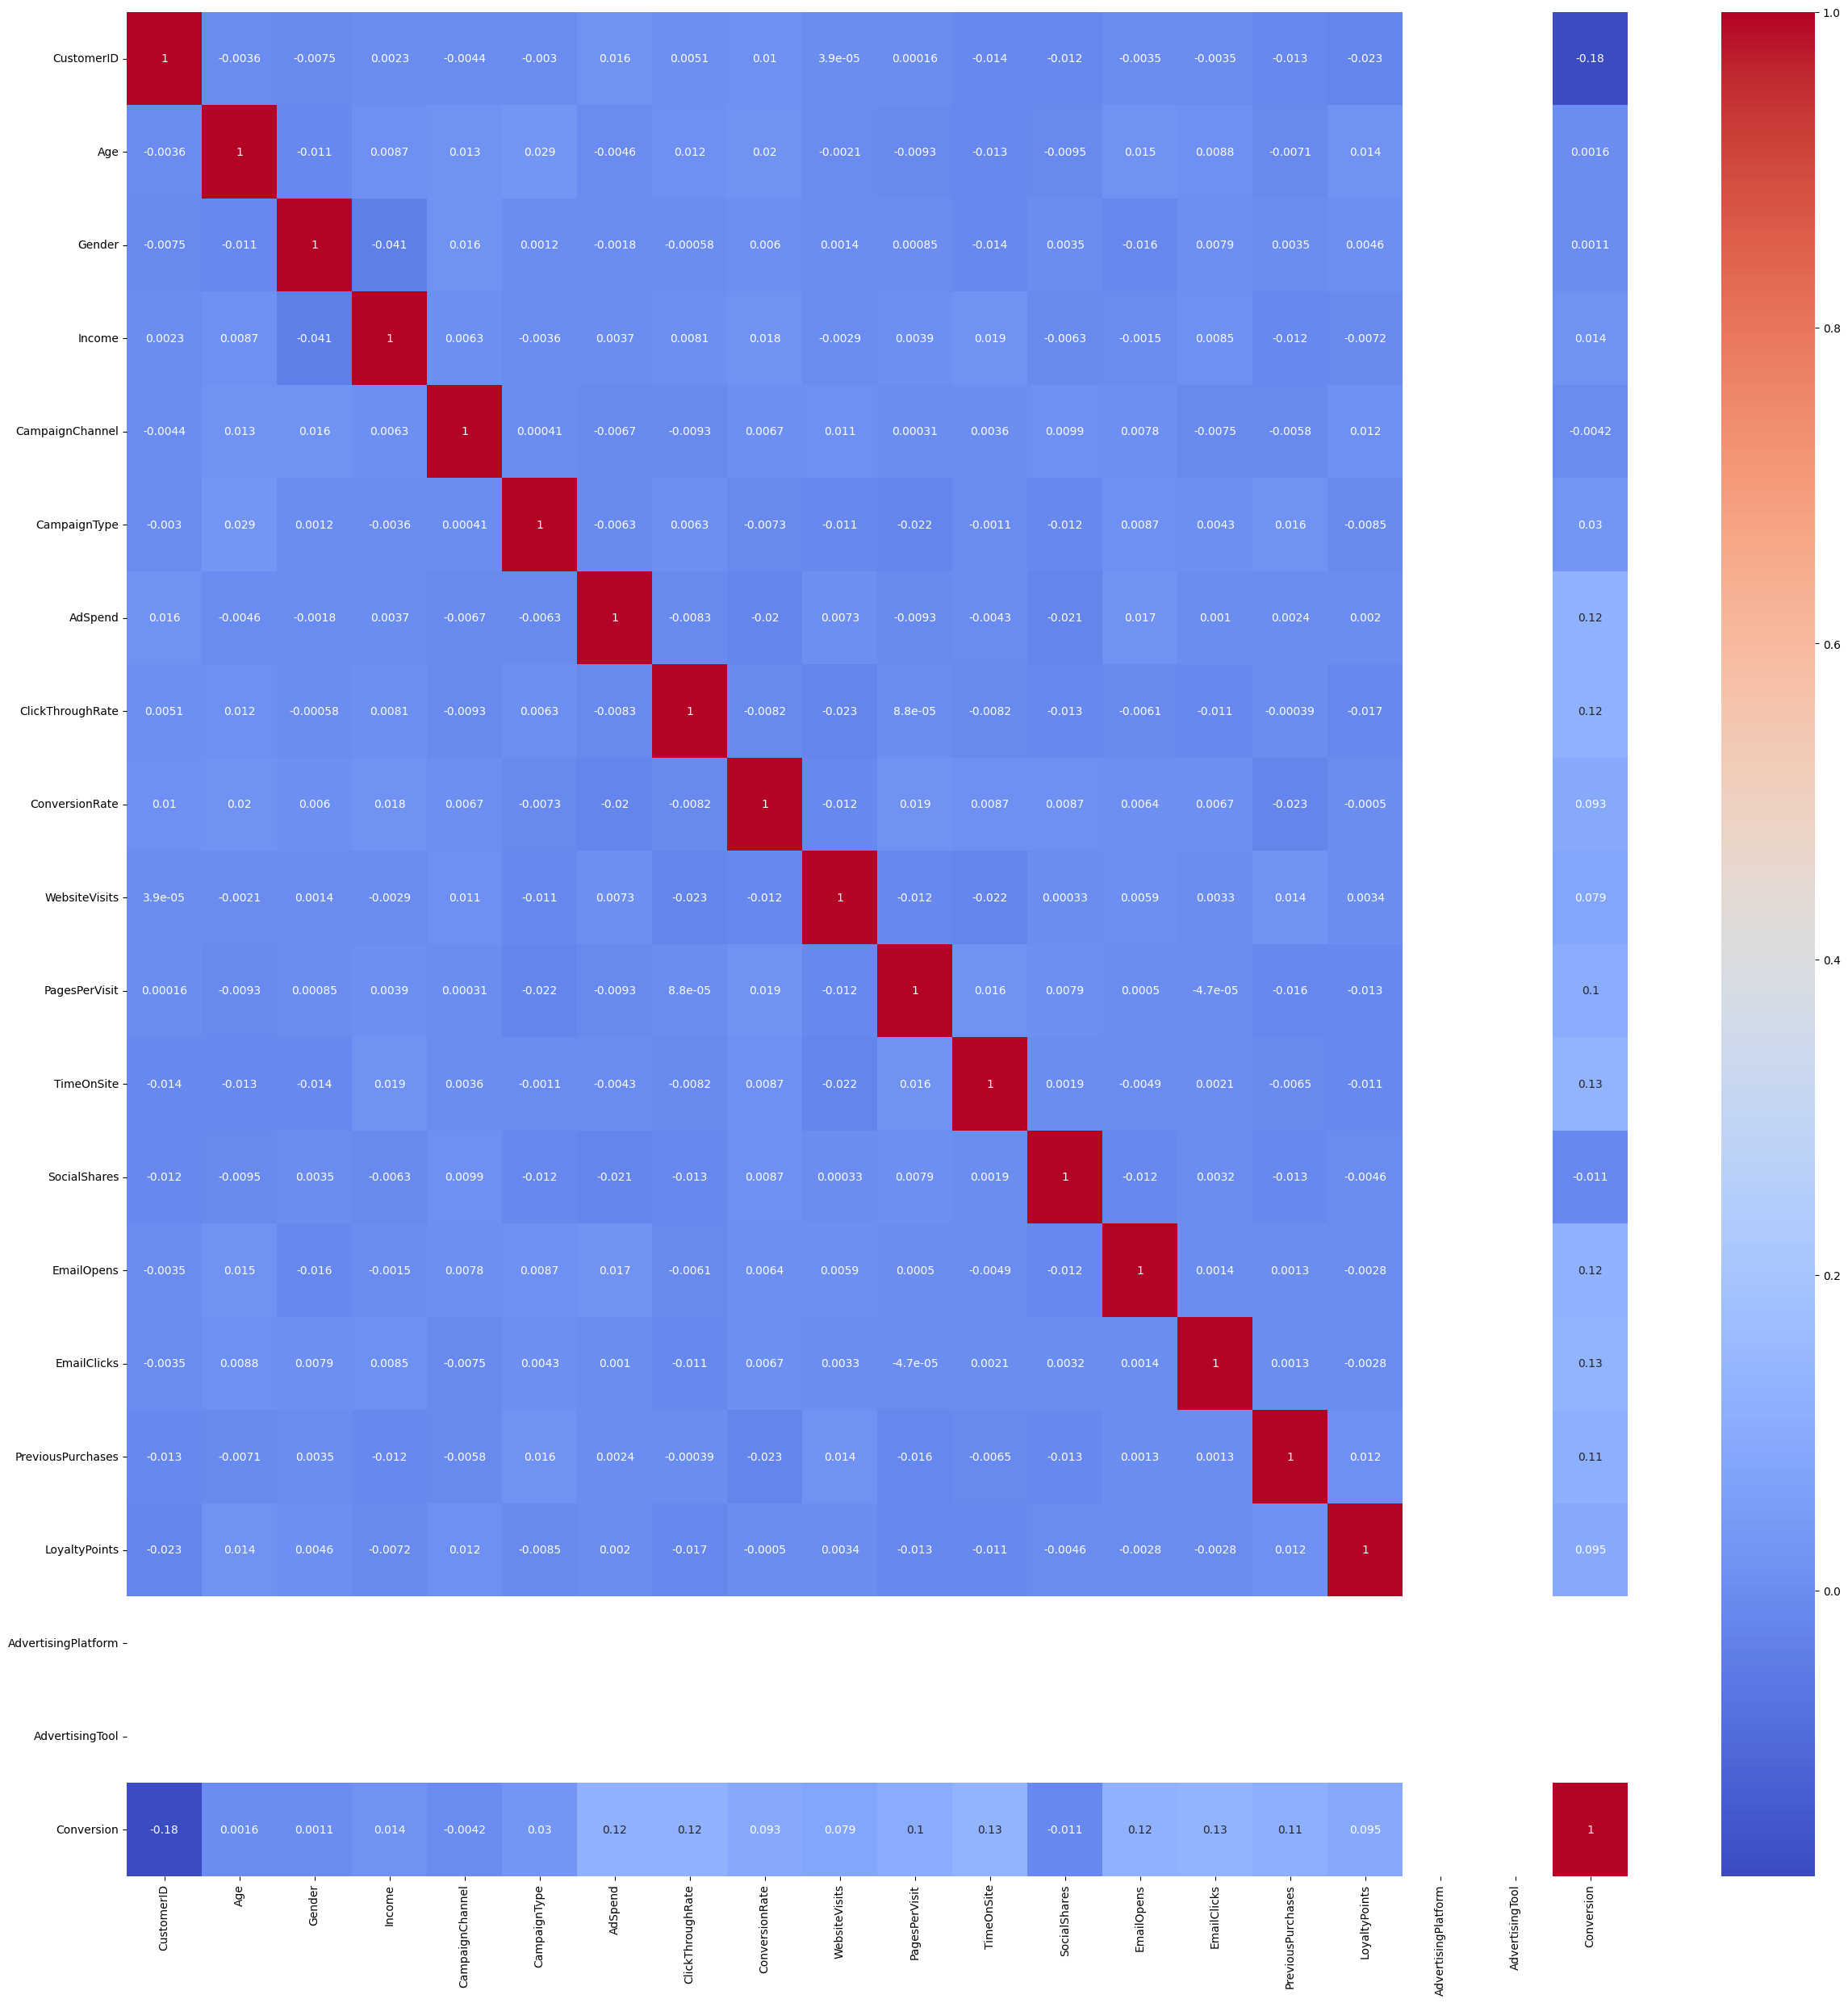

In [57]:
plt.figure(figsize=(30,30))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [58]:
df.drop(columns=["AdvertisingPlatform","AdvertisingTool","CustomerID"], axis =1, inplace= True)

In [59]:
y = df["Conversion"]
X = df.drop(columns=["Conversion"], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = xgb.XGBClassifier(n_estimators=400, max_depth = 12, random_state=45).fit(X_train, y_train)
model.score(X_test, y_test)

0.9175

In [61]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

F1-score: 0.9544198895027625


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

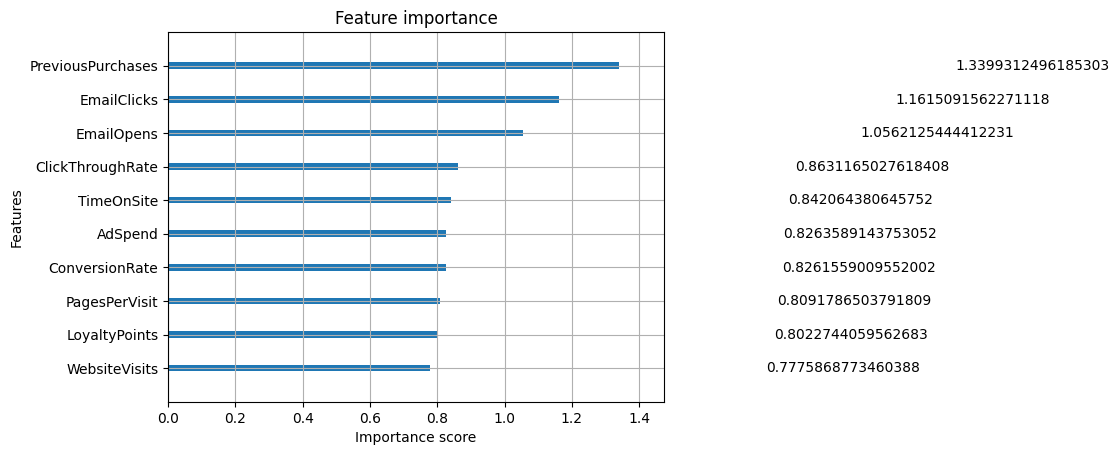

In [62]:
xgb.plot_importance(model, importance_type='gain', max_num_features=10)

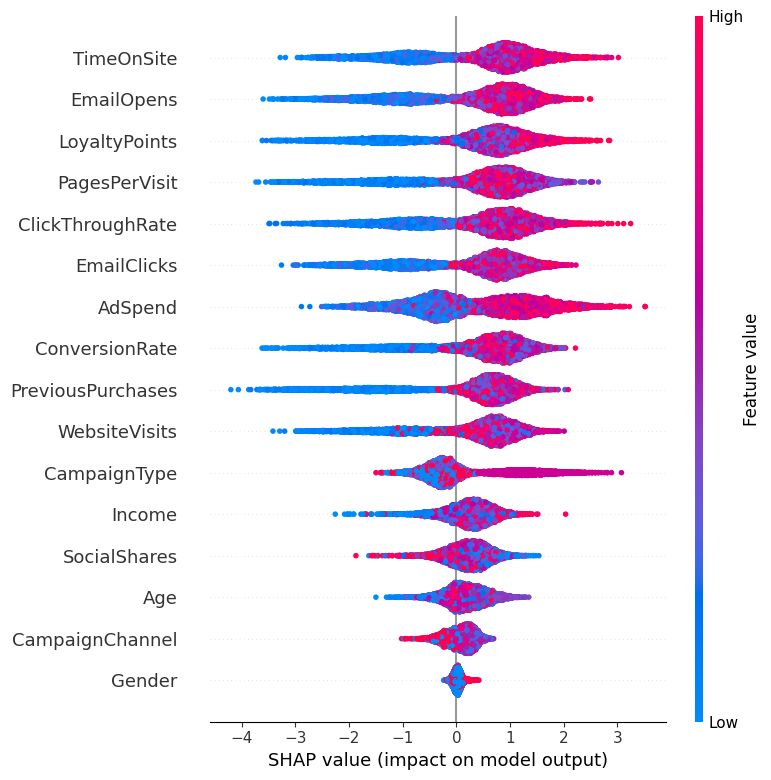

In [63]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)